In [1]:
import numpy as np

N = 10
eta = 0.1
num = 1000
var = 1

case = 0
for i in range(num):
    ais = np.random.normal(0,var,N)
    ais = ais ** 2
    temp = np.max(ais) + np.min(ais)
    if temp < 2/eta:
        case += 1
prob = case/num

In [2]:
def calcul_prob(N,num,eta,var):
    case = 0
    for i in range(num):
        ais = np.random.normal(0,var,N)
        ais = ais ** 2
        temp = np.max(ais) + np.min(ais)
        if temp < 2/eta:
            case += 1
    prob = case/num
    return prob

def calcul_prob_gen(N,num, eta, var, dim, batch):
    case = 0
    for i in range(num):
        hi_star = np.zeros((dim,dim))
        sigma_max = 0
        for n in range(N):
            his = np.zeros((dim,dim))
            for j in range(batch):
                ais = np.random.normal(0,var,(dim,1))
                his += ais @ ais.T / batch
            tmp_norm = np.linalg.norm(np.identity(dim) - eta * his)
            if tmp_norm >= sigma_max:
                sigma_max = tmp_norm
                hi_star = his
        eig_list = np.linalg.eig(hi_star)[0]
        eig_max = 0
        itm_max = 0
        for item in eig_list:
            tmp = np.abs(1 - eta * item)
            if tmp >= itm_max:
                eig_max = item
                itm_max = tmp
        if eig_max< (1/eta):
            case += 1
    prob = case/num
    return prob
            

def calcul_rho(N, num, eta, var, dim, batch):
#     N = 30
    tmp_list = []
    for i in range(num):
        his = np.zeros((dim,dim))
        for j in range(batch):
            ais = np.random.normal(0,var,(dim,1))
            his += ais @ ais.T / batch
        Id = np.kron(np.identity(dim), np.identity(N))
        H = np.kron( np.identity(N), his)
#         ais = np.random.normal(0,var,dim)
#         his = np.dot(ais.T, ais) / batch
#         h_list = h_list ** 2
#         H = np.diag(h_list)
        tmp_H = Id - eta * H
#         print(tmp_H)
        tmp_list.append(np.log(np.linalg.norm(tmp_H[0])))
#         print(np.log(np.linalg.det(tmp_H)))
#     print(H)
#     print(np.linalg.norm(tmp_H))
    return np.mean(tmp_list)

In [3]:
N_list = [1,5,10,15,20,25,30]
# eta_list = np.linspace(0,0.1,10)
eta_list = np.linspace(0.25,0.35,10)
prob_list = np.zeros((len(N_list), len(eta_list)))
rho_list = np.zeros(len(eta_list))
num = 5000
var = 1.3
dim = 100
batch = 100

for i in range(len(N_list)):
    print(i)
    for j in range(len(eta_list)):
        N = N_list[i]
        eta = eta_list[j]
        prob_list[i][j] =2* calcul_prob_gen(N,num,eta,var, dim, batch) - 1
    rho_list[j] = calcul_rho(N, num, eta,var, dim, batch)

0
1
2
3
4
5
6


In [4]:
rho_list

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.32969216])

In [5]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

,$\eta=$0.25,$\eta=$0.2611111111111111,$\eta=$0.2722222222222222,$\eta=$0.2833333333333333,$\eta=$0.29444444444444445,$\eta=$0.3055555555555555,$\eta=$0.31666666666666665,$\eta=$0.3277777777777777,$\eta=$0.33888888888888885,$\eta=$0.35
N=1,1.0,1.0000,0.9972,0.9624,0.7776,0.2180,-0.5136,-0.8976,-0.9948,-0.9996
N=5,1.0,1.0000,0.9932,0.9000,0.5180,-0.2684,-0.8704,-0.9948,-1.0000,-1.0000
N=10,1.0,0.9996,0.9888,0.8660,0.3848,-0.4492,-0.9252,-0.9976,-1.0000,-1.0000
N=15,1.0,0.9996,0.9856,0.8552,0.3076,-0.5432,-0.9532,-0.9988,-1.0000,-1.0000
N=20,1.0,0.9992,0.9832,0.8196,0.2248,-0.5908,-0.9604,-0.9996,-1.0000,-1.0000
N=25,1.0,0.9980,0.9788,0.8092,0.1832,-0.6060,-0.9704,-0.9996,-1.0000,-1.0000
N=30,1.0,0.9992,0.9768,0.7912,0.2052,-0.6508,-0.9728,-1.0000,-1.0000,-1.0000


In [9]:
prob_list

array([[ 3.    ,  3.    ,  2.9968,  1.1968, -4.8896, -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.984 , -0.4528, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9824, -1.2224, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9808, -1.5152, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9856, -1.7296, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9824, -1.944 , -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9744, -2.0064, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

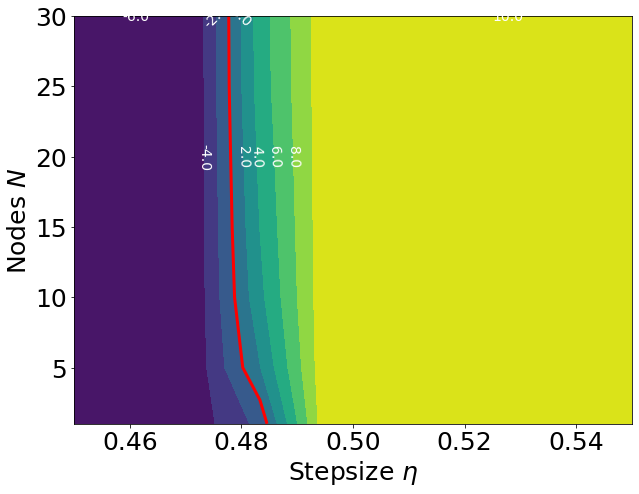

<Figure size 432x288 with 0 Axes>

In [10]:
# sigma = 1.3
import numpy as np
prob_list = np.array([[ 3.    ,  3.    ,  2.9968,  1.1968, -4.8896, -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.984 , -0.4528, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9824, -1.2224, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9808, -1.5152, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9856, -1.7296, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9824, -1.944 , -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ],
       [ 3.    ,  3.    ,  2.9744, -2.0064, -5.    , -5.    , -5.    ,
        -5.    , -5.    , -5.    ]])
tmp_list = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.34084314])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
Y = np.array( [1,5,10,15,20,25,30])
X = np.linspace(0.45,0.55,10)
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
# plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

# plt.text(0.45, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
# plt.text(0.5, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

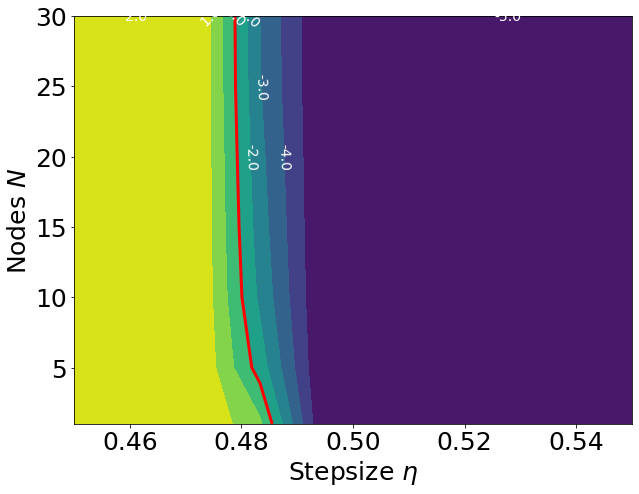

<Figure size 432x288 with 0 Axes>

In [8]:
# sigma = 1.3
import numpy as np
prob_list = np.array([[-1.    , -1.    , -0.9984, -0.0984,  2.9448,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.992 ,  0.7264,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.9912,  1.1112,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.9904,  1.2576,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.9928,  1.3648,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.9912,  1.472 ,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ],
       [-1.    , -1.    , -0.9872,  1.5032,  3.    ,  3.    ,  3.    ,
         3.    ,  3.    ,  3.    ]])
tmp_list = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.34084314])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
Y = np.array( [1,5,10,15,20,25,30])
X = np.linspace(0.45,0.55,10)
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
# plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

# plt.text(0.45, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
# plt.text(0.5, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()

In [6]:
prob_list

array([[ 1.    ,  1.    ,  0.9992,  0.5492, -0.9724, -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.996 ,  0.1368, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9956, -0.0556, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9952, -0.1288, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9964, -0.1824, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9956, -0.236 , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9936, -0.2516, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

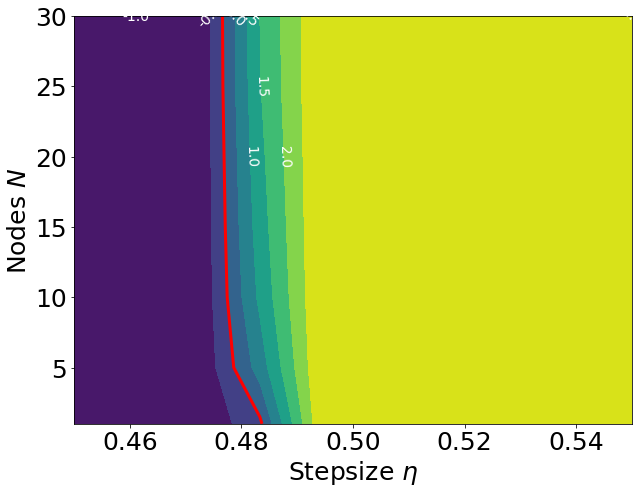

<Figure size 432x288 with 0 Axes>

In [7]:
# sigma = 1.3
import numpy as np
prob_list = np.array([[ 1.    ,  1.    ,  0.9992,  0.5492, -0.9724, -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.996 ,  0.1368, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9956, -0.0556, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9952, -0.1288, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9964, -0.1824, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9956, -0.236 , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ],
       [ 1.    ,  1.    ,  0.9936, -0.2516, -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ]])
tmp_list = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.34084314])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
Y = np.array( [1,5,10,15,20,25,30])
X = np.linspace(0.45,0.55,10)
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
# plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

# plt.text(0.45, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
# plt.text(0.5, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()

In [5]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

,$\eta=$0.45,$\eta=$0.46111111111111114,$\eta=$0.47222222222222227,$\eta=$0.48333333333333334,$\eta=$0.49444444444444446,$\eta=$0.5055555555555555,$\eta=$0.5166666666666667,$\eta=$0.5277777777777778,$\eta=$0.538888888888889,$\eta=$0.55
N=1,0.9992,0.9992,0.9848,0.9404,0.8224,0.6020,0.2348,-0.2376,-0.6244,-0.8628
N=5,0.9984,0.9892,0.9548,0.8532,0.6284,0.1928,-0.2808,-0.6968,-0.9092,-0.9824
N=10,0.9980,0.9888,0.9348,0.7912,0.4960,0.0452,-0.4644,-0.8248,-0.9580,-0.9960
N=15,0.9972,0.9820,0.9336,0.7576,0.4380,-0.0656,-0.5616,-0.8404,-0.9704,-0.9972
N=20,0.9940,0.9832,0.9184,0.7352,0.3832,-0.1036,-0.5996,-0.8936,-0.9780,-0.9984
N=25,0.9956,0.9744,0.8996,0.7108,0.3456,-0.1524,-0.6384,-0.9004,-0.9876,-0.9984
N=30,0.9952,0.9724,0.9020,0.7076,0.3292,-0.2192,-0.6736,-0.9132,-0.9884,-0.9996


In [128]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

,$\eta=$0.1,$\eta=$0.2,$\eta=$0.3,$\eta=$0.4,$\eta=$0.5,$\eta=$0.6,$\eta=$0.7,$\eta=$0.8,$\eta=$0.9
N=1,1.0,1.0,1.0,1.0,0.852,0.0,0.0,0.0,0.0
N=5,1.0,1.0,1.0,1.0,0.682,0.0,0.0,0.0,0.0
N=10,1.0,1.0,1.0,1.0,0.652,0.0,0.0,0.0,0.0
N=15,1.0,1.0,1.0,1.0,0.593,0.0,0.0,0.0,0.0
N=20,1.0,1.0,1.0,1.0,0.533,0.0,0.0,0.0,0.0
N=25,1.0,1.0,1.0,1.0,0.539,0.0,0.0,0.0,0.0
N=30,1.0,1.0,1.0,1.0,0.551,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

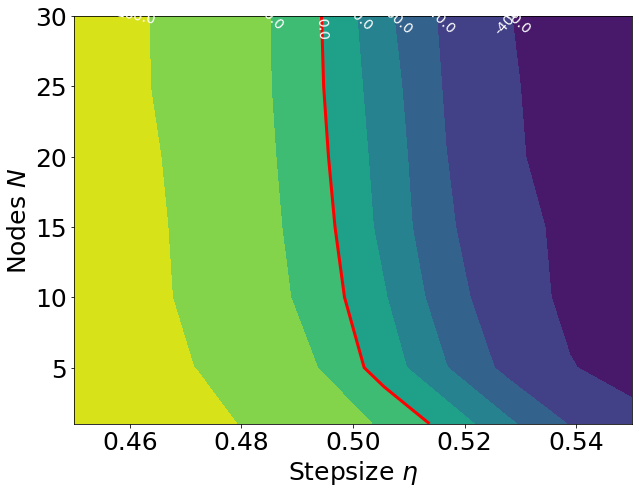

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
prob_list = np.array([[ 0.9992,  0.9992,  0.9848,  0.9404,  0.8224,  0.602 ,  0.2348,
        -0.2376, -0.6244, -0.8628],
       [ 0.9984,  0.9892,  0.9548,  0.8532,  0.6284,  0.1928, -0.2808,
        -0.6968, -0.9092, -0.9824],
       [ 0.998 ,  0.9888,  0.9348,  0.7912,  0.496 ,  0.0452, -0.4644,
        -0.8248, -0.958 , -0.996 ],
       [ 0.9972,  0.982 ,  0.9336,  0.7576,  0.438 , -0.0656, -0.5616,
        -0.8404, -0.9704, -0.9972],
       [ 0.994 ,  0.9832,  0.9184,  0.7352,  0.3832, -0.1036, -0.5996,
        -0.8936, -0.978 , -0.9984],
       [ 0.9956,  0.9744,  0.8996,  0.7108,  0.3456, -0.1524, -0.6384,
        -0.9004, -0.9876, -0.9984],
       [ 0.9952,  0.9724,  0.902 ,  0.7076,  0.3292, -0.2192, -0.6736,
        -0.9132, -0.9884, -0.9996]])
tmp_list = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.34084314])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
Y = np.array( [1,5,10,15,20,25,30])
X = np.linspace(0.45,0.55,10)
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
# plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

# plt.text(0.45, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
# plt.text(0.5, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

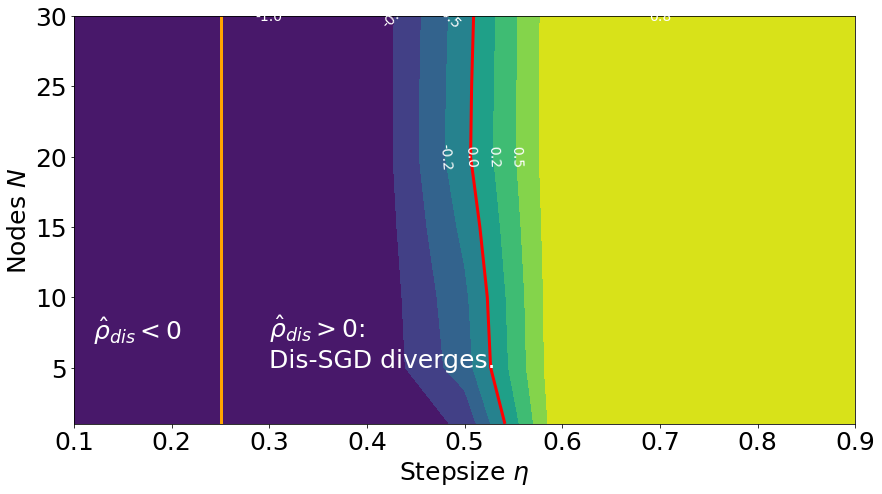

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
prob_list = np.array([[1.   , 1.   , 1.   , 1.   , 0.852, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.682, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.652, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.593, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.533, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.539, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.551, 0.   , 0.   , 0.   , 0.   ]])
tmp_list = np.array([-0.3279205 , -0.19344247,  0.18597807,  0.52697797,  0.79291211,
        1.0083382 ,  1.19082015,  1.34471956,  1.48283386])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,7.5))
Y = np.array([1,5,10,15,20,25,30])
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

plt.text(0.12, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
plt.text(0.3, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()